# Homework 2 BIG

In [240]:
import csv
import openpyxl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import solve_ivp
from sympy import Symbol, Point2D, Point3D, Derivative, Function, Eq,cos,sin
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.patches as patches
from IPython.display import HTML, display
from datetime import datetime

## Preparing the data

Convert the data from the one column in the data.xlsx file into the three columns to the file data1.xlsx, so that we can read them easily.

In [241]:
# Load the workbook
workbook = openpyxl.load_workbook('./tests/data.xlsx')

# Select the active worksheet
worksheet = workbook.active

# Open a new workbook to write the modified data
new_workbook = openpyxl.Workbook()
new_worksheet = new_workbook.active

# Iterate through rows starting from A4
for row in range(4, worksheet.max_row + 1):
    # Split the data by '->' and then by space
    data = worksheet.cell(row=row, column=1).value.split('->')
    time_data = data[0].strip()
    second_column_data, third_column_data = map(str.strip, data[1].split())

    # Write data to new workbook
    new_worksheet.cell(row=row-3, column=1).value = time_data
    new_worksheet.cell(row=row-3, column=2).value = second_column_data
    new_worksheet.cell(row=row-3, column=3).value = third_column_data

# Save the new workbook
new_workbook.save('./tests/data1.xlsx')

Get the values from the .csv files to plot the graphs

In [242]:
def calculate_angular_velocity(angle, time_data):
    angular_velocity = []
    for i in range(0, len(angle)-1):
        delta_angle = angle[i+1] - angle[i]
        delta_time = time_data[i+1] - time_data[i]
        angular_velocity.append(delta_angle / delta_time)
    return angular_velocity

def calculate_velocity(position, time_data):
    velocity = []
    for i in range(0, len(position)-1):
        delta_position = position[i+1] - position[i]
        delta_time = time_data[i+1] - time_data[i]
        velocity.append(delta_position / delta_time)
    return velocity

# Function to convert time string to seconds
def time_to_seconds(time_str):
    time_obj = datetime.strptime(time_str, '%H:%M:%S.%f')
    return (time_obj - datetime.min).total_seconds()

In [243]:
# Read data from CSV files
# Initial angles are because we get another "zero" as zero angle after conducting the experiment. 
# For some reason the starting angle is shifting. Mikhail said this because of the speed of data processing by the sensor
initial_angle_15_1 = 0
initial_angle_15_2 = 0
initial_angle_15_3 = 0
with open('./tests_csv/test1_15.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip header
    data_15_1 = list(reader)
with open('./tests_csv/test2_15.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip header
    data_15_2 = list(reader)
with open('./tests_csv/test3_15.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip header
    data_15_3 = list(reader)

initial_angle_45_1 = 0.6
initial_angle_45_2 = 1.91
initial_angle_45_3 = 2.04
with open('./tests_csv/test1_45.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip header
    data_45_1 = list(reader)
with open('./tests_csv/test2_45.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip header
    data_45_2 = list(reader)
with open('./tests_csv/test2_45.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip header
    data_45_3 = list(reader)
   
initial_angle_135_1 = 2.6
initial_angle_135_2 = 4.12
initial_angle_135_3 = 4.25
with open('./tests_csv/test1_135.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip header
    data_135_1 = list(reader)
with open('./tests_csv/test2_135.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip header
    data_135_2 = list(reader)
with open('./tests_csv/test3_135.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip header
    data_135_3 = list(reader)

# Extract data
# For the time it is enough to get only from 1st file
time_data = [time_to_seconds(row[0]) - time_to_seconds(data_15_1[0][0]) for row in data_15_1]

# But for other we need to get another values
position_data_15_1 = [float(row[1]) for row in data_15_1]
angle_data_15_1 = [float(row[2]) - initial_angle_15_1 for row in data_15_1]
position_data_15_2 = [float(row[1]) for row in data_15_2]
angle_data_15_2 = [float(row[2]) - initial_angle_15_2 for row in data_15_2]
position_data_15_3 = [float(row[1]) for row in data_15_3]
angle_data_15_3 = [float(row[2]) - initial_angle_15_3 for row in data_15_3]

position_data_45_1 = [float(row[1]) for row in data_45_1]
angle_data_45_1 = [float(row[2]) - initial_angle_45_1 for row in data_45_1]
position_data_45_2 = [float(row[1]) for row in data_45_2]
angle_data_45_2 = [float(row[2]) - initial_angle_45_2 for row in data_45_2]
position_data_45_3 = [float(row[1]) for row in data_45_3]
angle_data_45_3 = [float(row[2]) - initial_angle_45_3 for row in data_45_3]

position_data_135_1 = [float(row[1]) for row in data_135_1]
angle_data_135_1 = [float(row[2]) - initial_angle_135_1 for row in data_135_1]
position_data_135_2 = [float(row[1]) for row in data_135_2]
angle_data_135_2 = [float(row[2]) - initial_angle_135_2 for row in data_135_2]
position_data_135_3 = [float(row[1]) for row in data_135_3]
angle_data_135_3 = [float(row[2]) - initial_angle_135_3 for row in data_135_3]


# Get the average for the test with 15 degrees
position_data_average_15 = []
for i, j, k in zip(position_data_15_1, position_data_15_2, position_data_15_3):
    position_data_average_15.append((i+j+k)/3)
    
angle_data_average_15 = []
for i, j, k in zip(angle_data_15_1, angle_data_15_2, angle_data_15_3):
    angle_data_average_15.append((i+j+k)/3)


# Get the average for the test with 45 degrees
position_data_average_45 = []
for i, j, k in zip(position_data_45_1, position_data_45_2, position_data_45_3):
    position_data_average_45.append((i+j+k)/3)
    
angle_data_average_45 = []
for i, j, k in zip(angle_data_45_1, angle_data_45_2, angle_data_45_3):
    angle_data_average_45.append((i+j+k)/3)


# Get the average for the test with -135 degrees
position_data_average_135 = []
for i, j, k in zip(position_data_135_1, position_data_135_2, position_data_135_3):
    position_data_average_135.append((i+j+k)/3)
    
angle_data_average_135 = []
for i, j, k in zip(angle_data_135_1, angle_data_135_2, angle_data_135_3):
    angle_data_average_135.append((i+j+k)/3)

# time_diff = [t - time_data[i-1] if i > 0 else 0 for i, t in enumerate(time_data)]
# position_velocity = [position_data[i] / time_diff[i] if time_diff[i] != 0 else 0 for i in range(len(position_data))]
# angle_velocity = [angle_data[i] / time_diff[i] if time_diff[i] != 0 else 0 for i in range(len(angle_data))]

# Calculate velocities
position_velocity_15_1 = calculate_velocity(position_data_15_1, time_data)
angle_velocity_15_1 = calculate_angular_velocity(angle_data_15_1, time_data)

position_velocity_15_2 = calculate_velocity(position_data_15_2, time_data)
angle_velocity_15_2 = calculate_angular_velocity(angle_data_15_2, time_data)

position_velocity_15_3 = calculate_velocity(position_data_15_3, time_data)
angle_velocity_15_3 = calculate_angular_velocity(angle_data_15_3, time_data)

position_velocity_15_average = calculate_velocity(position_data_average_15, time_data)
angle_velocity_15_average = calculate_angular_velocity(angle_data_average_15, time_data)


position_velocity_45_1 = calculate_velocity(position_data_45_1, time_data)
angle_velocity_45_1 = calculate_angular_velocity(angle_data_45_1, time_data)

position_velocity_45_2 = calculate_velocity(position_data_45_2, time_data)
angle_velocity_45_2 = calculate_angular_velocity(angle_data_45_2, time_data)

position_velocity_45_3 = calculate_velocity(position_data_45_3, time_data)
angle_velocity_45_3 = calculate_angular_velocity(angle_data_45_3, time_data)

position_velocity_45_average = calculate_velocity(position_data_average_45, time_data)
angle_velocity_45_average = calculate_angular_velocity(angle_data_average_45, time_data)


position_velocity_135_1 = calculate_velocity(position_data_135_1, time_data)
angle_velocity_135_1 = calculate_angular_velocity(angle_data_135_1, time_data)

position_velocity_135_2 = calculate_velocity(position_data_135_2, time_data)
angle_velocity_135_2 = calculate_angular_velocity(angle_data_135_2, time_data)

position_velocity_135_3 = calculate_velocity(position_data_135_3, time_data)
angle_velocity_135_3 = calculate_angular_velocity(angle_data_135_3, time_data)

position_velocity_135_average = calculate_velocity(position_data_average_135, time_data)
angle_velocity_135_average = calculate_angular_velocity(angle_data_average_135, time_data)


## Plots for the real data

### Test 1 15 deg

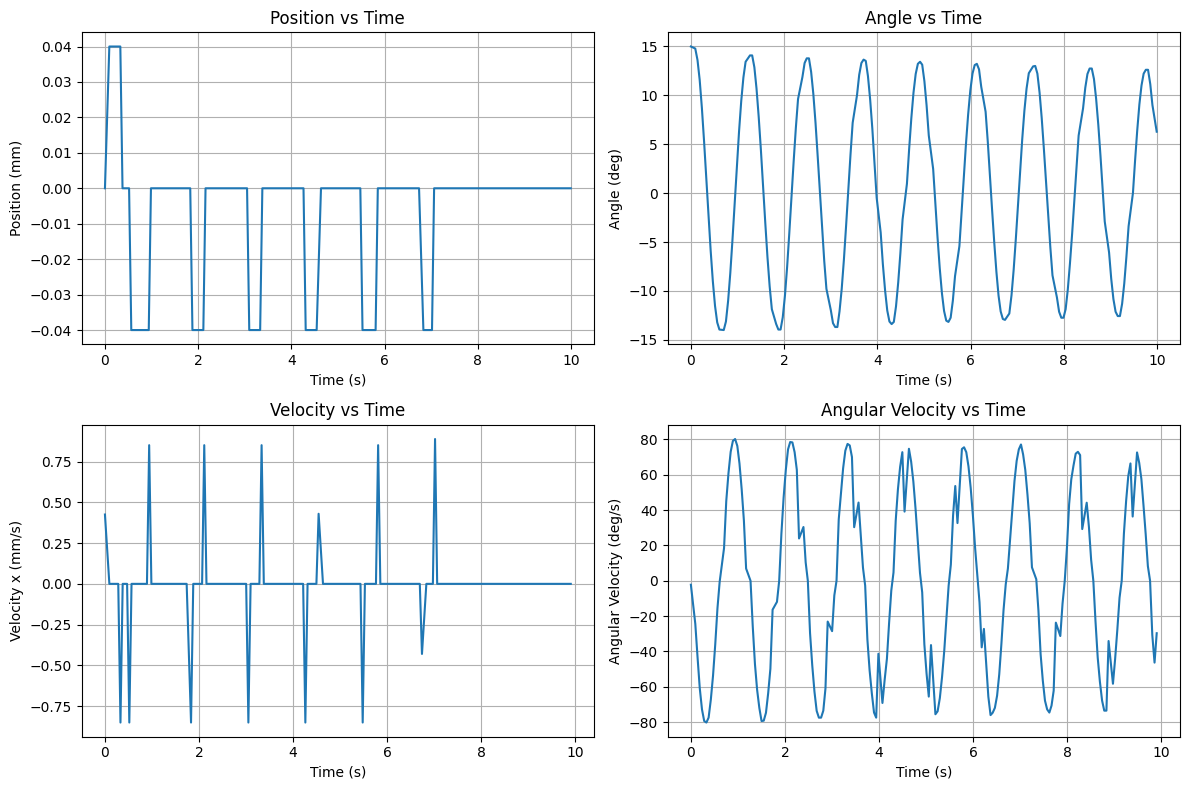

In [244]:
# Plotting the test1 15 degrees
plt.figure(figsize=(12, 8))

# Plot 1: Position (time)
plt.subplot(2, 2, 1)
plt.grid(True)
plt.plot(time_data, position_data_15_1)
plt.title('Position vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (mm)')

# Plot 2: Angle (time)
plt.subplot(2, 2, 2)
plt.grid(True)
plt.plot(time_data, angle_data_15_1)
plt.title('Angle vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Angle (deg)')

# Plot 3: Velocity x (time)
plt.subplot(2, 2, 3)
plt.grid(True)
plt.plot(time_data[:-1], position_velocity_15_1)
plt.title('Velocity vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity x (mm/s)')

# Plot 4: Angular Velocity (time)
plt.subplot(2, 2, 4)
plt.grid(True)
plt.plot(time_data[:-1], angle_velocity_15_1)
plt.title('Angular Velocity vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity (deg/s)')

plt.tight_layout()
plt.savefig("./plots/15_deg_test1.jpg")
plt.show()


### Test 2 15 deg

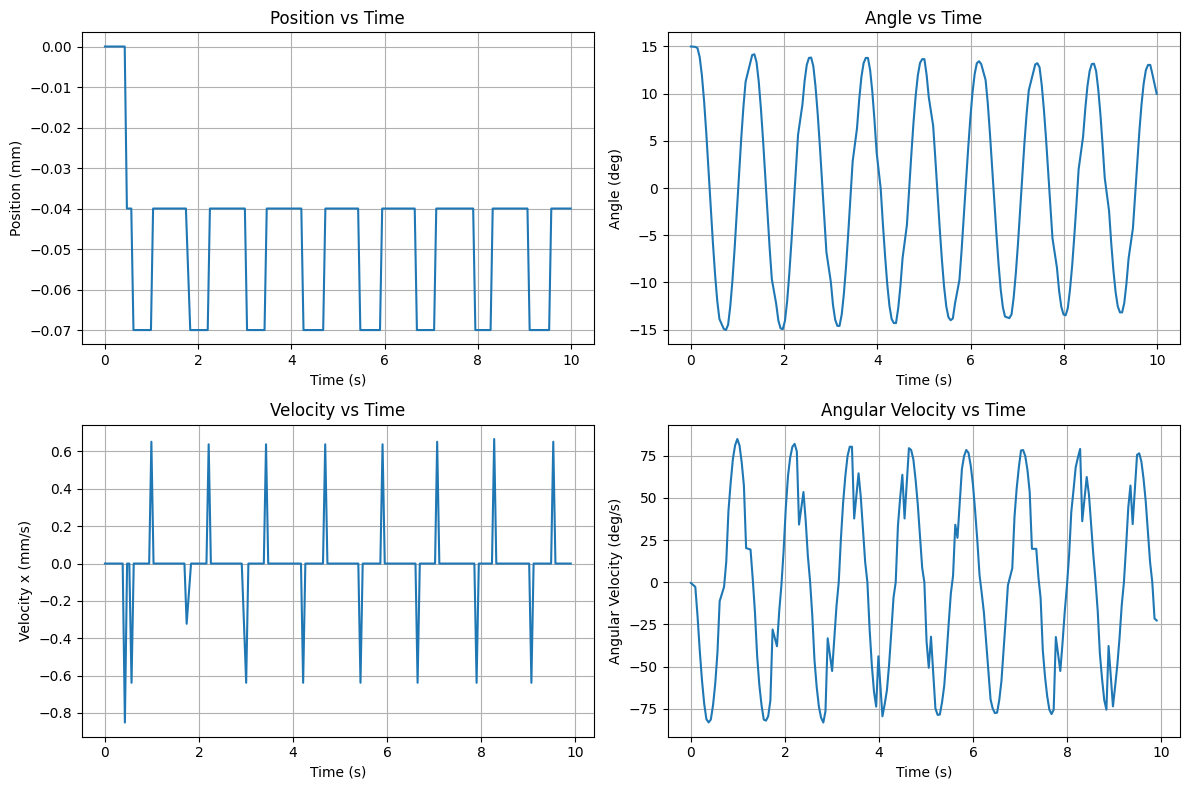

In [245]:
# Plotting the test2 15 degrees
plt.figure(figsize=(12, 8))

# Plot 1: Position (time)
plt.subplot(2, 2, 1)
plt.grid(True)
plt.plot(time_data, position_data_15_2)
plt.title('Position vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (mm)')

# Plot 2: Angle (time)
plt.subplot(2, 2, 2)
plt.grid(True)
plt.plot(time_data, angle_data_15_2)
plt.title('Angle vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Angle (deg)')

# Plot 3: Velocity x (time)
plt.subplot(2, 2, 3)
plt.grid(True)
plt.plot(time_data[:-1], position_velocity_15_2)
plt.title('Velocity vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity x (mm/s)')

# Plot 4: Angular Velocity (time)
plt.subplot(2, 2, 4)
plt.grid(True)
plt.plot(time_data[:-1], angle_velocity_15_2)
plt.title('Angular Velocity vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity (deg/s)')

plt.tight_layout()
plt.savefig("./plots/15_deg_test2.jpg")
plt.show()

### Test 3 15 deg

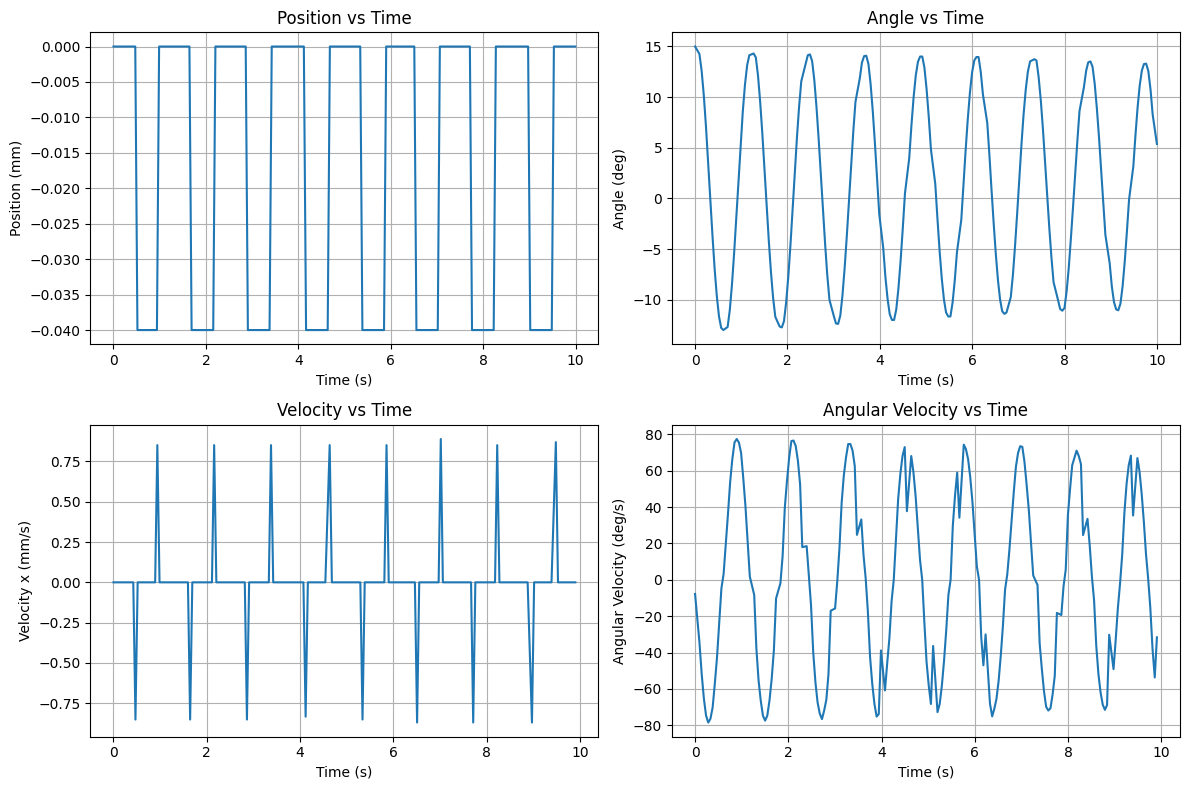

In [246]:
# Plotting the test3 15 degrees
plt.figure(figsize=(12, 8))

# Plot 1: Position (time)
plt.subplot(2, 2, 1)
plt.grid(True)
plt.plot(time_data, position_data_15_3)
plt.title('Position vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (mm)')

# Plot 2: Angle (time)
plt.subplot(2, 2, 2)
plt.grid(True)
plt.plot(time_data, angle_data_15_3)
plt.title('Angle vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Angle (deg)')

# Plot 3: Velocity x (time)
plt.subplot(2, 2, 3)
plt.grid(True)
plt.plot(time_data[:-1], position_velocity_15_3)
plt.title('Velocity vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity x (mm/s)')

# Plot 4: Angular Velocity (time)
plt.subplot(2, 2, 4)
plt.grid(True)
plt.plot(time_data[:-1], angle_velocity_15_3)
plt.title('Angular Velocity vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity (deg/s)')

plt.tight_layout()
plt.savefig("./plots/15_deg_test3.jpg")
plt.show()

### Average 15 deg

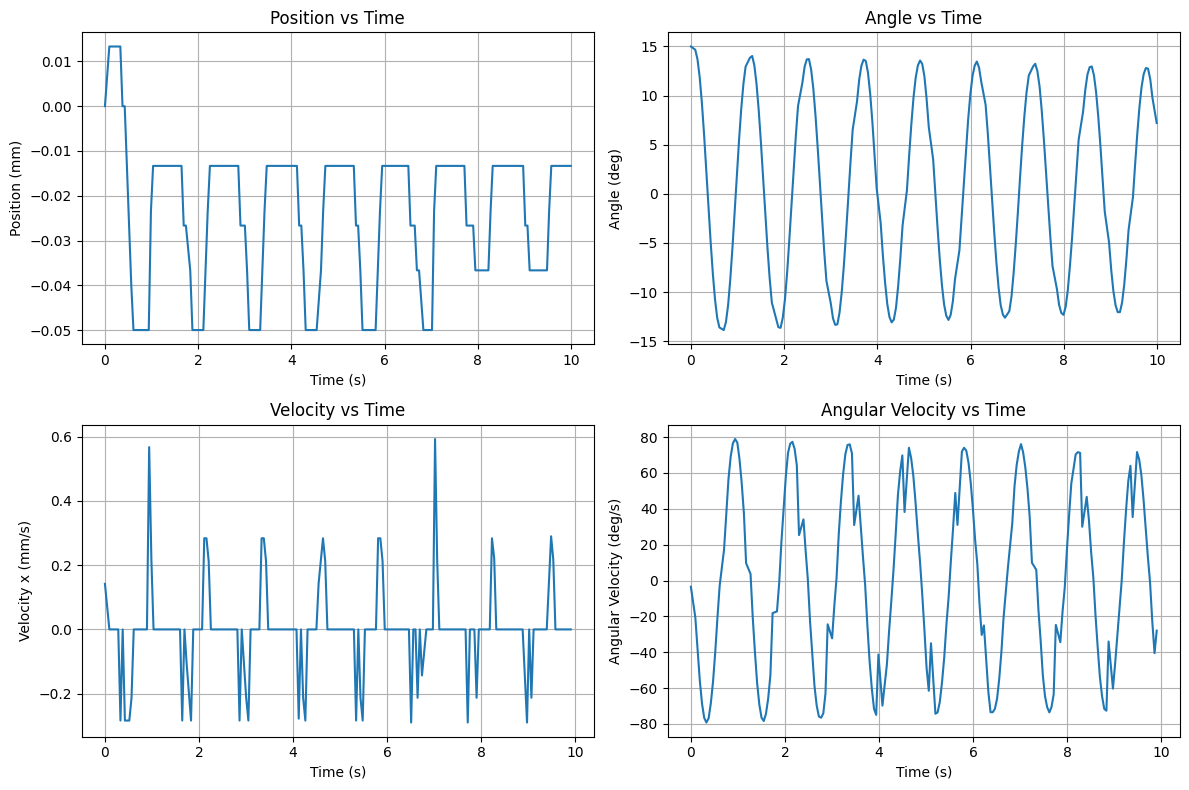

In [247]:
# Plotting the average 15 degrees
plt.figure(figsize=(12, 8))

# Plot 1: Position (time)
plt.subplot(2, 2, 1)
plt.grid(True)
plt.plot(time_data, position_data_average_15)
plt.title('Position vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (mm)')

# Plot 2: Angle (time)
plt.subplot(2, 2, 2)
plt.grid(True)
plt.plot(time_data, angle_data_average_15)
plt.title('Angle vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Angle (deg)')

# Plot 3: Velocity x (time)
plt.subplot(2, 2, 3)
plt.grid(True)
plt.plot(time_data[:-1], position_velocity_15_average)
plt.title('Velocity vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity x (mm/s)')

# Plot 4: Angular Velocity (time)
plt.subplot(2, 2, 4)
plt.grid(True)
plt.plot(time_data[:-1], angle_velocity_15_average)
plt.title('Angular Velocity vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity (deg/s)')

plt.tight_layout()
plt.savefig("./plots/15_deg_average.jpg")
plt.show()

### Test 1 45 deg

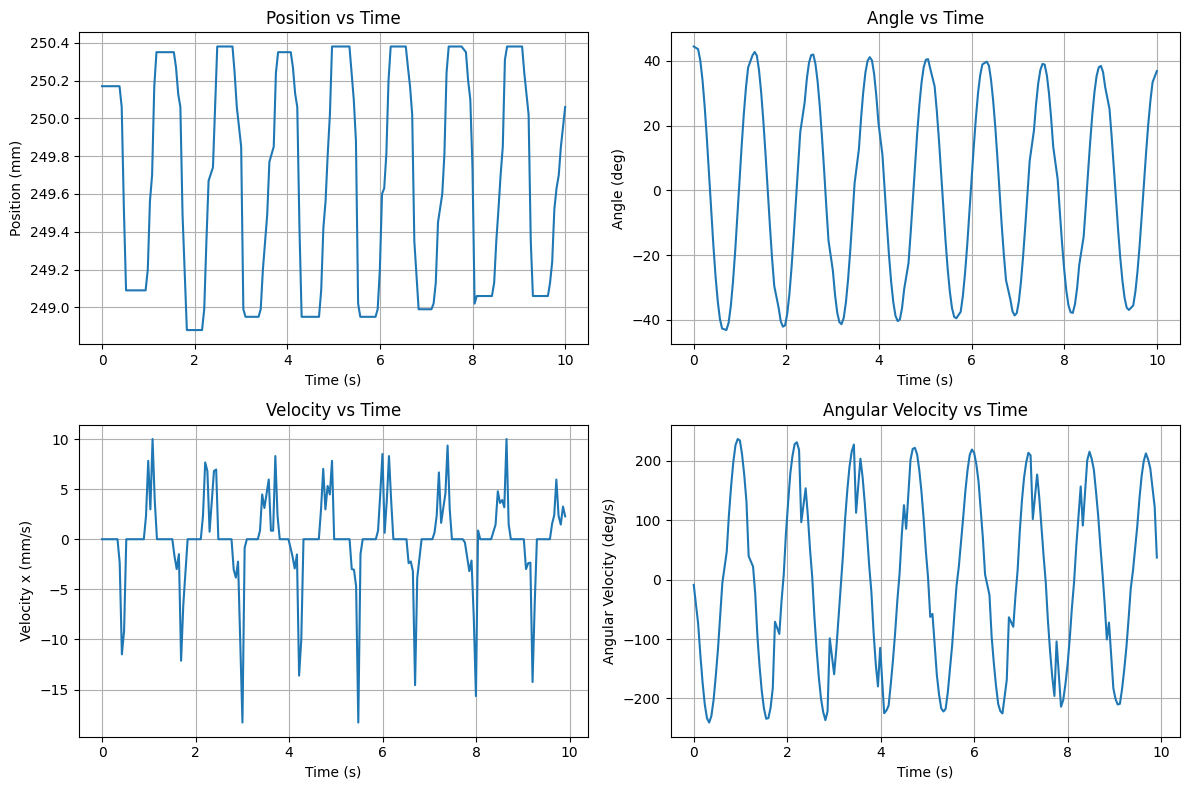

In [248]:
# Plotting the test1 45 degrees
plt.figure(figsize=(12, 8))

# Plot 1: Position (time)
plt.subplot(2, 2, 1)
plt.grid(True)
plt.plot(time_data, position_data_45_1)
plt.title('Position vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (mm)')

# Plot 2: Angle (time)
plt.subplot(2, 2, 2)
plt.grid(True)
plt.plot(time_data, angle_data_45_1)
plt.title('Angle vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Angle (deg)')

# Plot 3: Velocity x (time)
plt.subplot(2, 2, 3)
plt.grid(True)
plt.plot(time_data[:-1], position_velocity_45_1)
plt.title('Velocity vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity x (mm/s)')

# Plot 4: Angular Velocity (time)
plt.subplot(2, 2, 4)
plt.grid(True)
plt.plot(time_data[:-1], angle_velocity_45_1)
plt.title('Angular Velocity vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity (deg/s)')

plt.tight_layout()
plt.savefig("./plots/45_deg_test1.jpg")
plt.show()

### Test 2 45 deg

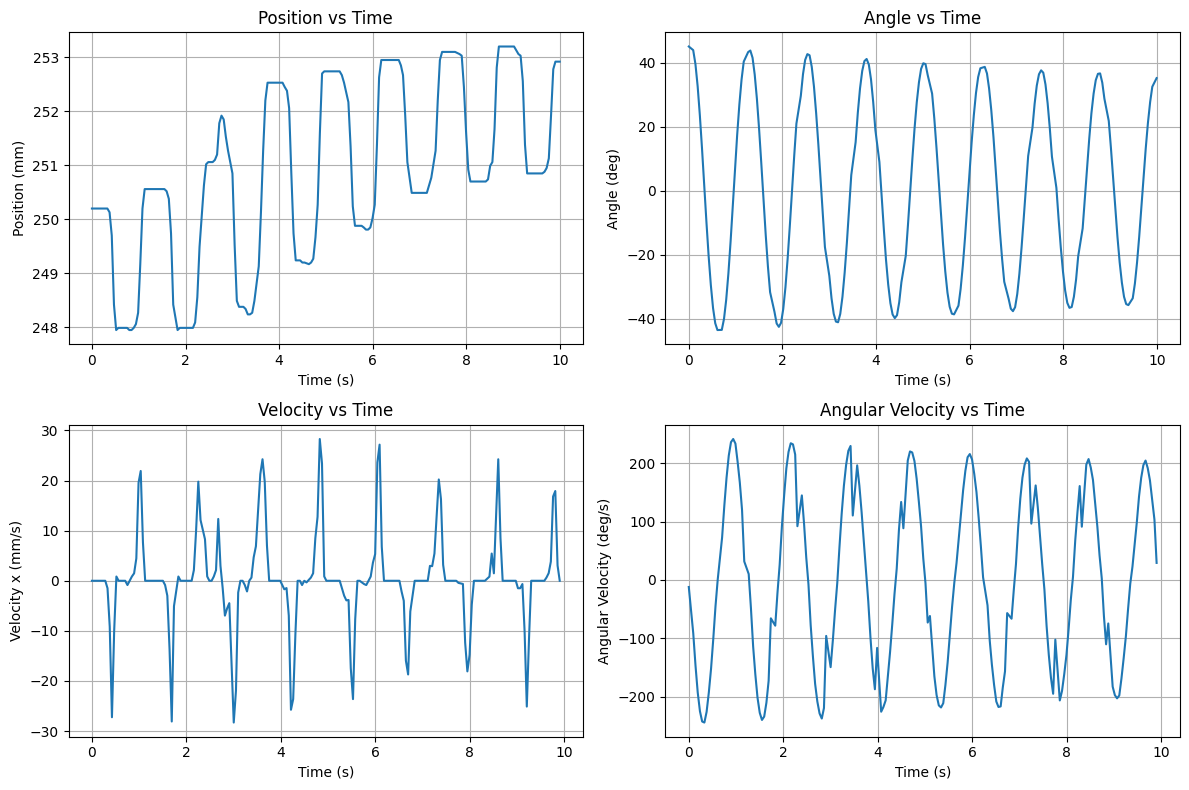

In [249]:
# Plotting the test2 45 degrees
plt.figure(figsize=(12, 8))

# Plot 1: Position (time)
plt.subplot(2, 2, 1)
plt.grid(True)
plt.plot(time_data, position_data_45_2)
plt.title('Position vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (mm)')

# Plot 2: Angle (time)
plt.subplot(2, 2, 2)
plt.grid(True)
plt.plot(time_data, angle_data_45_2)
plt.title('Angle vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Angle (deg)')

# Plot 3: Velocity x (time)
plt.subplot(2, 2, 3)
plt.grid(True)
plt.plot(time_data[:-1], position_velocity_45_2)
plt.title('Velocity vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity x (mm/s)')

# Plot 4: Angular Velocity (time)
plt.subplot(2, 2, 4)
plt.grid(True)
plt.plot(time_data[:-1], angle_velocity_45_2)
plt.title('Angular Velocity vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity (deg/s)')

plt.tight_layout()
plt.savefig("./plots/45_deg_test2.jpg")
plt.show()

### Test 3 45 deg

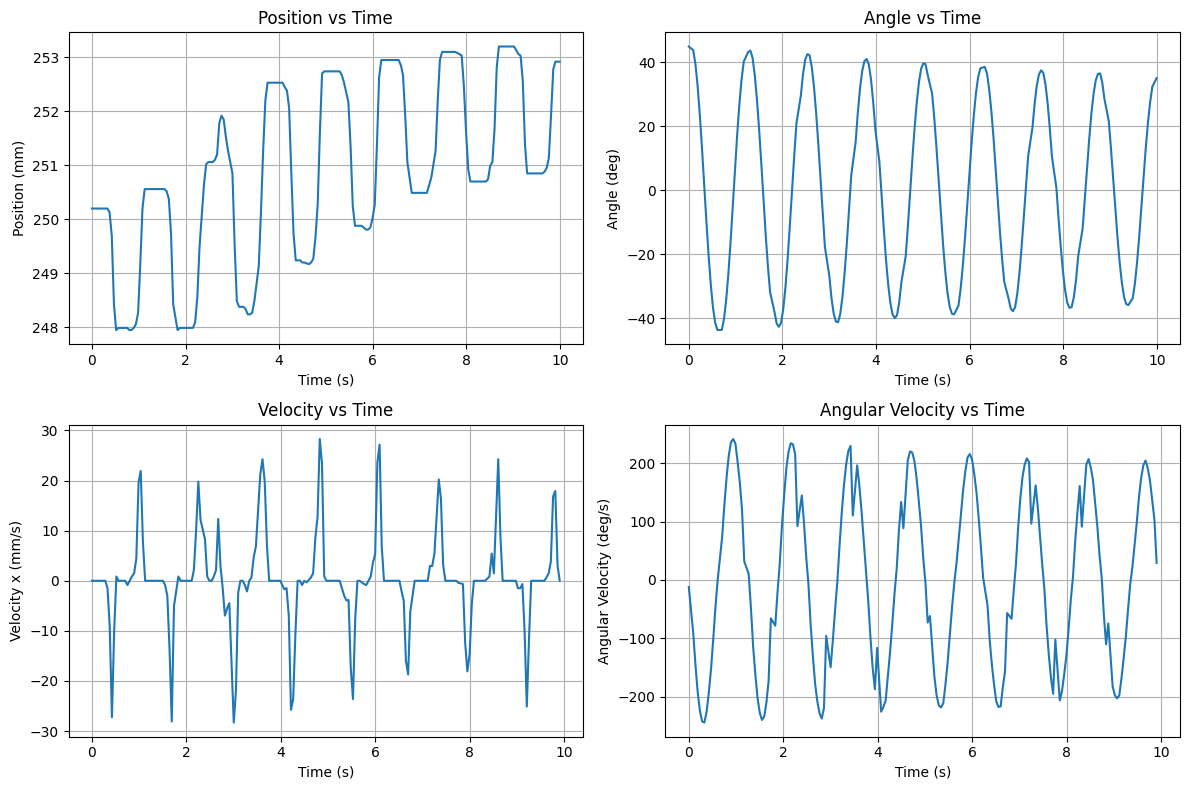

In [250]:
# Plotting the test3 45 degrees
plt.figure(figsize=(12, 8))

# Plot 1: Position (time)
plt.subplot(2, 2, 1)
plt.grid(True)
plt.plot(time_data, position_data_45_3)
plt.title('Position vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (mm)')

# Plot 2: Angle (time)
plt.subplot(2, 2, 2)
plt.grid(True)
plt.plot(time_data, angle_data_45_3)
plt.title('Angle vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Angle (deg)')

# Plot 3: Velocity x (time)
plt.subplot(2, 2, 3)
plt.grid(True)
plt.plot(time_data[:-1], position_velocity_45_3)
plt.title('Velocity vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity x (mm/s)')

# Plot 4: Angular Velocity (time)
plt.subplot(2, 2, 4)
plt.grid(True)
plt.plot(time_data[:-1], angle_velocity_45_3)
plt.title('Angular Velocity vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity (deg/s)')

plt.tight_layout()
plt.savefig("./plots/45_deg_test3.jpg")
plt.show()

### Average 45 deg

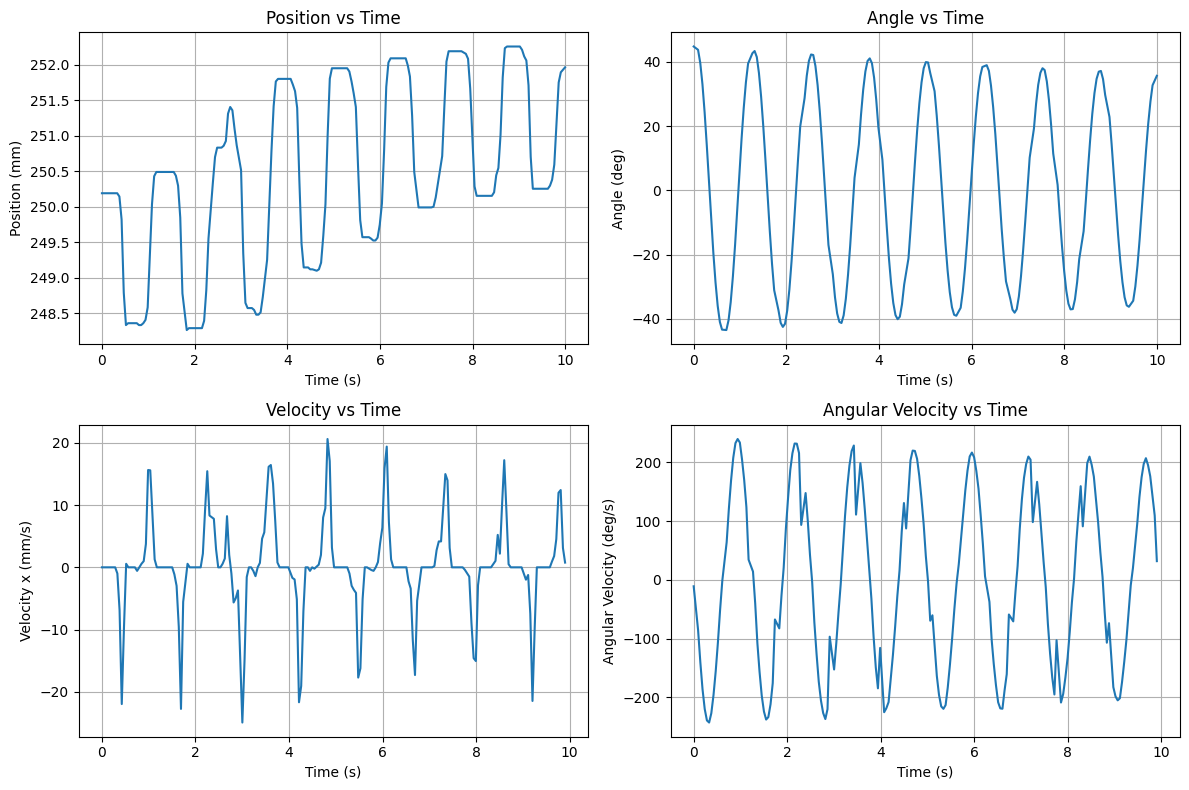

In [251]:
# Plotting the average 45 degrees
plt.figure(figsize=(12, 8))

# Plot 1: Position (time)
plt.subplot(2, 2, 1)
plt.grid(True)
plt.plot(time_data, position_data_average_45)
plt.title('Position vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (mm)')

# Plot 2: Angle (time)
plt.subplot(2, 2, 2)
plt.grid(True)
plt.plot(time_data, angle_data_average_45)
plt.title('Angle vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Angle (deg)')

# Plot 3: Velocity x (time)
plt.subplot(2, 2, 3)
plt.grid(True)
plt.plot(time_data[:-1], position_velocity_45_average)
plt.title('Velocity vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity x (mm/s)')

# Plot 4: Angular Velocity (time)
plt.subplot(2, 2, 4)
plt.grid(True)
plt.plot(time_data[:-1], angle_velocity_45_average)
plt.title('Angular Velocity vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity (deg/s)')

plt.tight_layout()
plt.savefig("./plots/45_deg_average.jpg")
plt.show()

### Test 1 -135 deg

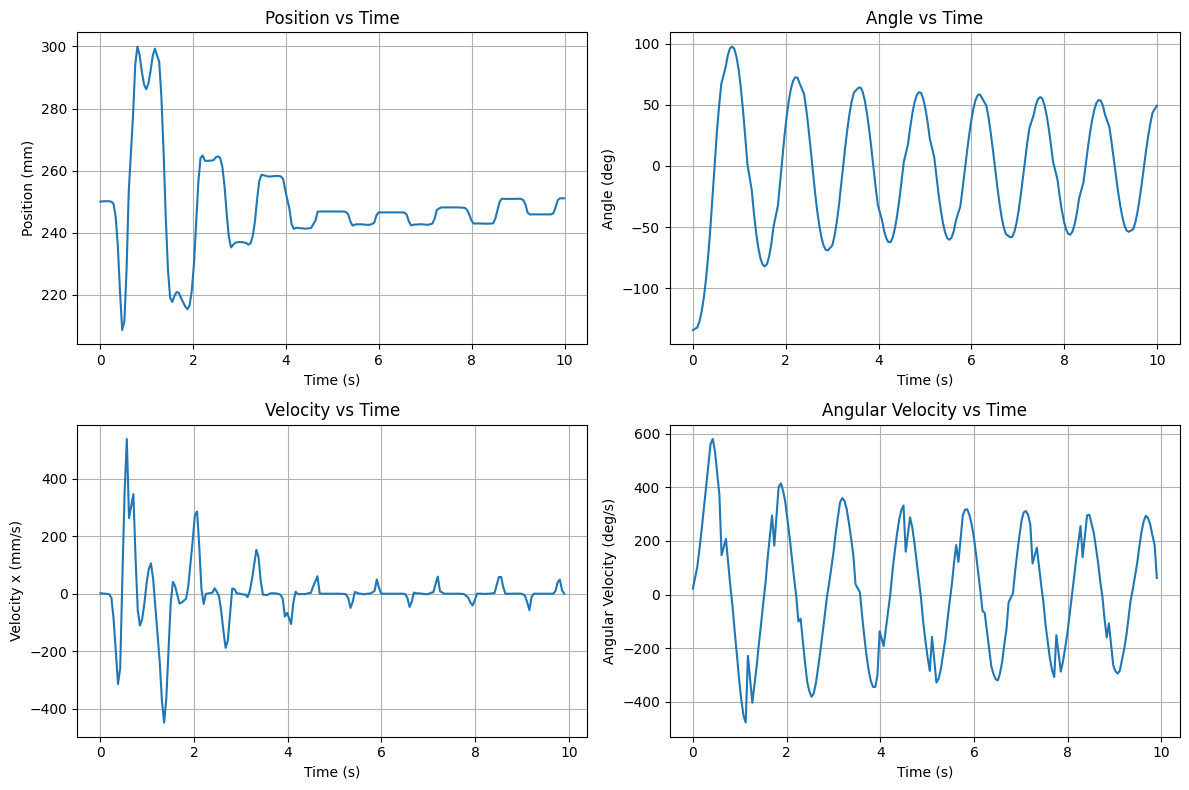

In [252]:
# Plotting the test1 -135 degrees
plt.figure(figsize=(12, 8))

# Plot 1: Position (time)
plt.subplot(2, 2, 1)
plt.grid(True)
plt.plot(time_data, position_data_135_1)
plt.title('Position vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (mm)')

# Plot 2: Angle (time)
plt.subplot(2, 2, 2)
plt.grid(True)
plt.plot(time_data, angle_data_135_1)
plt.title('Angle vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Angle (deg)')

# Plot 3: Velocity x (time)
plt.subplot(2, 2, 3)
plt.grid(True)
plt.plot(time_data[:-1], position_velocity_135_1)
plt.title('Velocity vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity x (mm/s)')

# Plot 4: Angular Velocity (time)
plt.subplot(2, 2, 4)
plt.grid(True)
plt.plot(time_data[:-1], angle_velocity_135_1)
plt.title('Angular Velocity vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity (deg/s)')

plt.tight_layout()
plt.savefig("./plots/135_deg_test1.jpg")
plt.show()

### Test 2 -135 deg

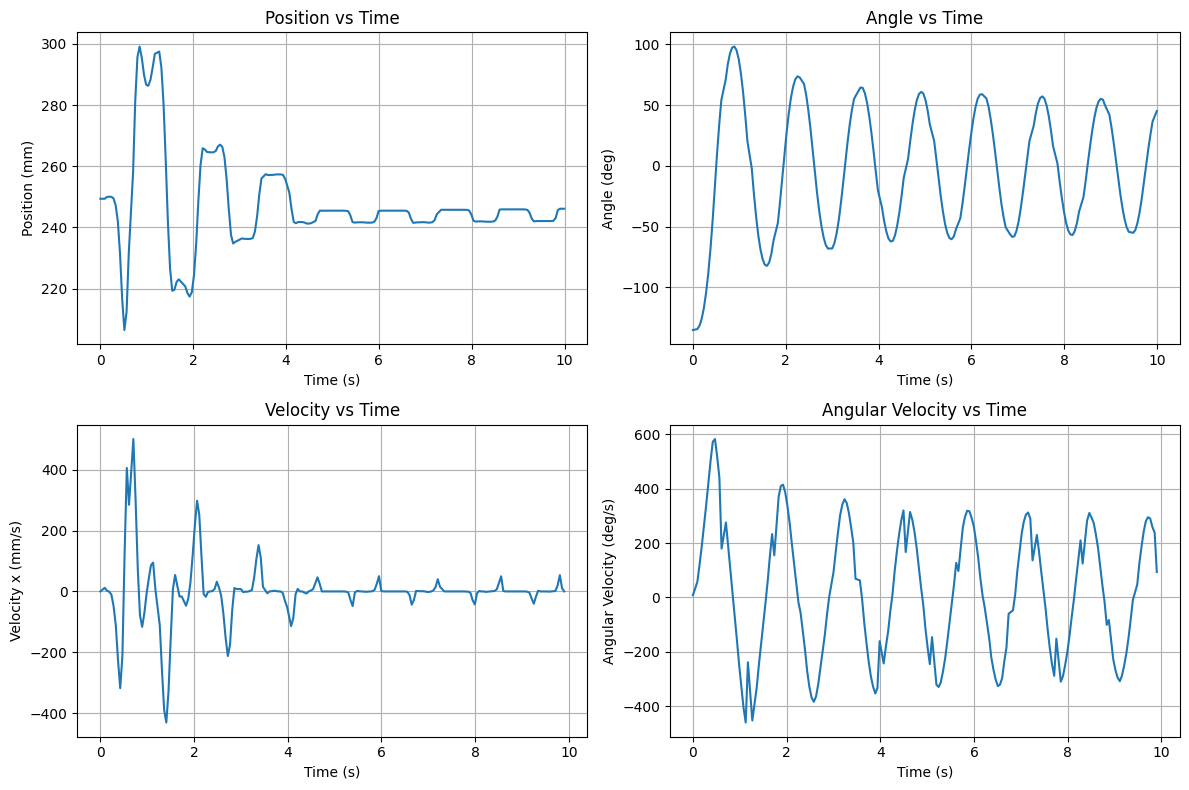

In [253]:
# Plotting the test2 -135 degrees
plt.figure(figsize=(12, 8))

# Plot 1: Position (time)
plt.subplot(2, 2, 1)
plt.grid(True)
plt.plot(time_data, position_data_135_2)
plt.title('Position vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (mm)')

# Plot 2: Angle (time)
plt.subplot(2, 2, 2)
plt.grid(True)
plt.plot(time_data, angle_data_135_2)
plt.title('Angle vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Angle (deg)')

# Plot 3: Velocity x (time)
plt.subplot(2, 2, 3)
plt.grid(True)
plt.plot(time_data[:-1], position_velocity_135_2)
plt.title('Velocity vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity x (mm/s)')

# Plot 4: Angular Velocity (time)
plt.subplot(2, 2, 4)
plt.grid(True)
plt.plot(time_data[:-1], angle_velocity_135_2)
plt.title('Angular Velocity vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity (deg/s)')

plt.tight_layout()
plt.savefig("./plots/135_deg_test2.jpg")
plt.show()

### Test 3 -135 deg

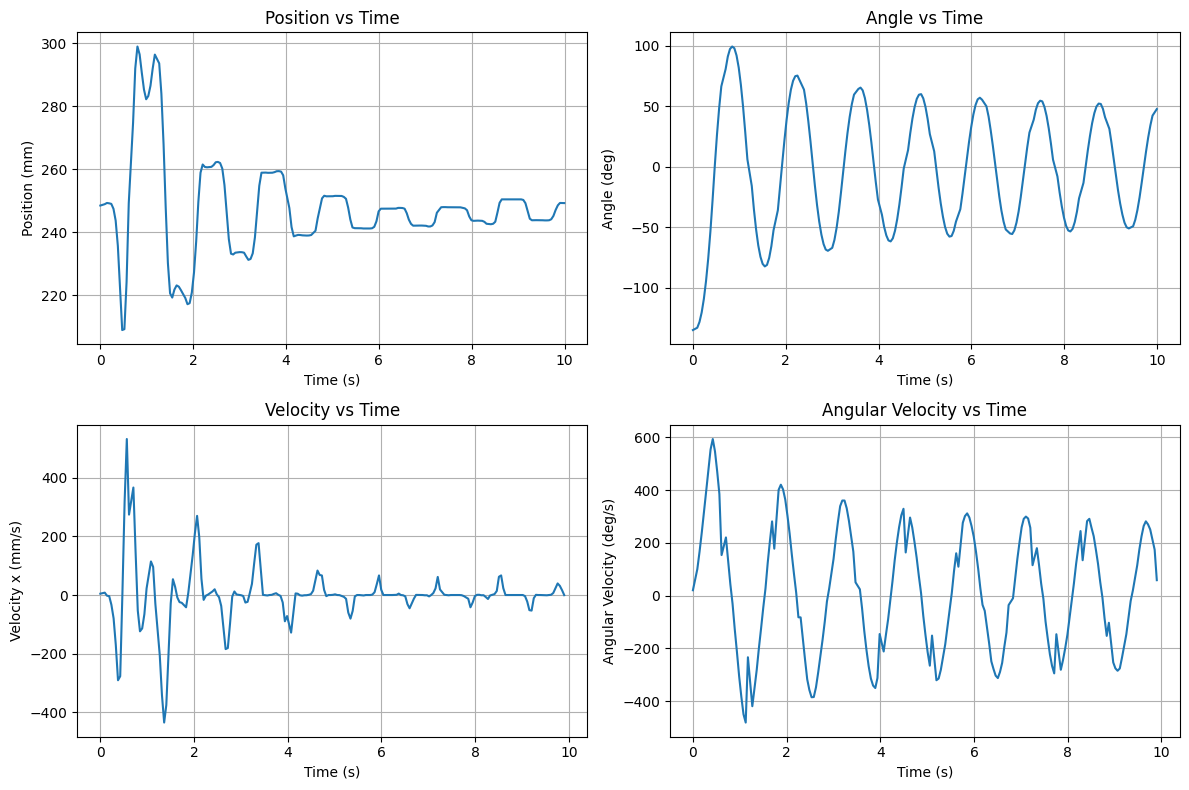

In [254]:
# Plotting the test3 -135 degrees
plt.figure(figsize=(12, 8))

# Plot 1: Position (time)
plt.subplot(2, 2, 1)
plt.grid(True)
plt.plot(time_data, position_data_135_3)
plt.title('Position vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (mm)')

# Plot 2: Angle (time)
plt.subplot(2, 2, 2)
plt.grid(True)
plt.plot(time_data, angle_data_135_3)
plt.title('Angle vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Angle (deg)')

# Plot 3: Velocity x (time)
plt.subplot(2, 2, 3)
plt.grid(True)
plt.plot(time_data[:-1], position_velocity_135_3)
plt.title('Velocity vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity x (mm/s)')

# Plot 4: Angular Velocity (time)
plt.subplot(2, 2, 4)
plt.grid(True)
plt.plot(time_data[:-1], angle_velocity_135_3)
plt.title('Angular Velocity vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity (deg/s)')

plt.tight_layout()
plt.savefig("./plots/135_deg_test3.jpg")
plt.show()

### Average -135 deg

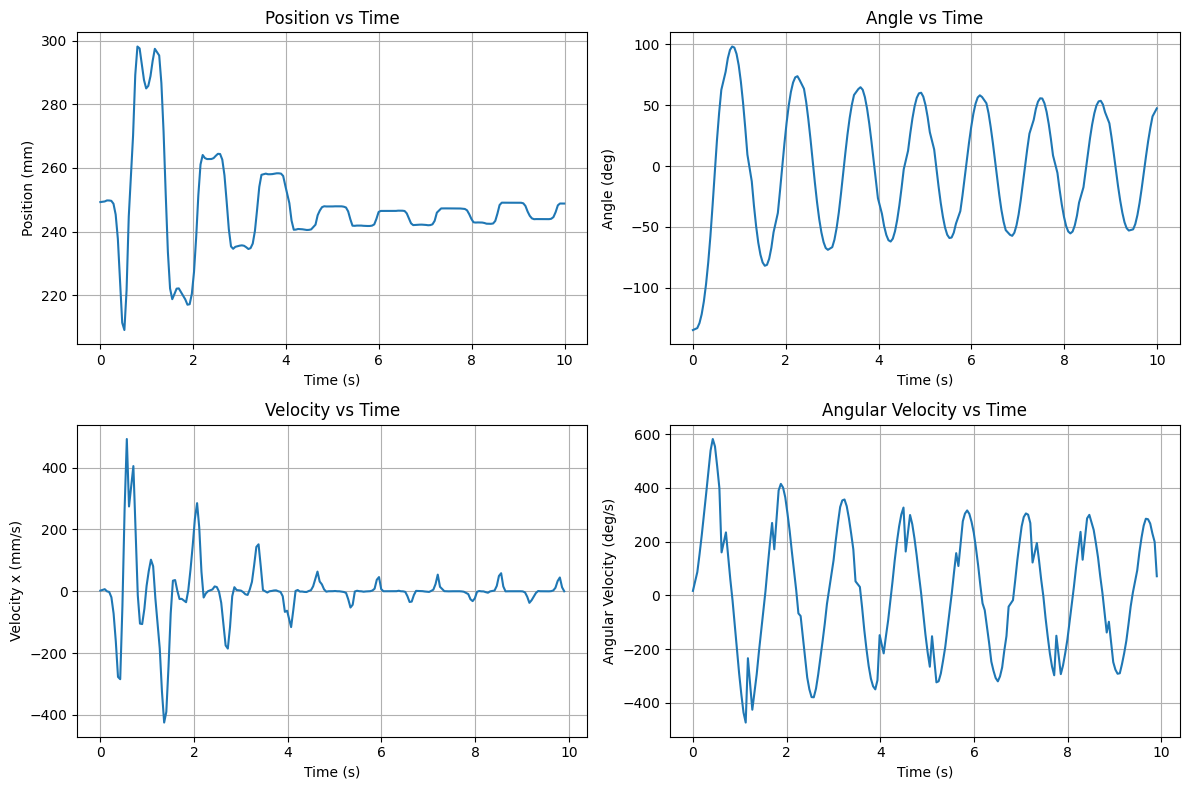

In [255]:
# Plotting the average -135 degrees
plt.figure(figsize=(12, 8))

# Plot 1: Position (time)
plt.subplot(2, 2, 1)
plt.grid(True)
plt.plot(time_data, position_data_average_135)
plt.title('Position vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (mm)')

# Plot 2: Angle (time)
plt.subplot(2, 2, 2)
plt.grid(True)
plt.plot(time_data, angle_data_average_135)
plt.title('Angle vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Angle (deg)')

# Plot 3: Velocity x (time)
plt.subplot(2, 2, 3)
plt.grid(True)
plt.plot(time_data[:-1], position_velocity_135_average)
plt.title('Velocity vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity x (mm/s)')

# Plot 4: Angular Velocity (time)
plt.subplot(2, 2, 4)
plt.grid(True)
plt.plot(time_data[:-1], angle_velocity_135_average)
plt.title('Angular Velocity vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity (deg/s)')

plt.tight_layout()
plt.savefig("./plots/135_deg_average.jpg")
plt.show()

# Newton-Euler approach

In [312]:
# Get the exact value for g
from scipy.constants import g, e

# Parameters that we measured
m1 = 0.266  # kg
m2 = 0.154  # kg
l = 0.38   # m
air_drag = 0.05  # Air drag coefficient for pendulum
friction = 15  # Friction coefficient for cart

# Function defining the equations of motion
def equations(t, y):
    phi, phi_dot, x, x_dot = y
    phi_double_dot = (
                             -g * (m1 + m2) * np.sin(phi) - m2 * l * np.sin(phi) * np.cos(phi) * phi_dot ** 2 - air_drag * phi_dot
                     ) / (
            l * (m1 + m2 * np.sin(phi)**2)
    )
    
    x_double_dot = ( 
                           g * m2 * np.sin(phi) * np.cos(phi) + m2 * l * np.sin(phi) ** 3 * phi_dot ** 2 + 
                           m2 * l * np.sin(phi) * np.cos(phi) ** 2 * phi_dot ** 2 - friction * x_dot
                   ) / (
            m1 * np.sin(phi)**2 + m1 * np.cos(phi)**2 + m2 * np.sin(phi)**2
    )
    
    return [phi_dot, phi_double_dot, x_dot, x_double_dot]

# Initial conditions from the slide
phi0 = np.radians(-135)  # Initial angle in radians
phi_dot0 = 0      # Initial angular velocity
x0 = 0.25            # Initial position
x_dot0 = 0        # Initial velocity

initial_conditions = [phi0, phi_dot0, x0, x_dot0]

# Time span. 196 since in the tests we have 196 lines
t_span = np.linspace(0, 10, 196)

# Solve the differential equations
sol = solve_ivp(equations, [t_span[0], t_span[-1]], initial_conditions, t_eval=t_span)

# Extracting solutions
phi_sol = sol.y[0]
phi_dot_sol = sol.y[1]
x_sol = sol.y[2]
x_dot_sol = sol.y[3]

# Convert angle from radians to degrees for the plot
phi_deg = np.degrees(phi_sol)
phi_dot_deg = np.degrees(phi_dot_sol)


# We do not need the vectors for velocities and accelerations. They are in HW7

# Function to update the animation
def update(i):
    cart.set_xy([x_sol[i] - 0.25, -0.05])
    rod.set_data([x_sol[i], x_sol[i] + np.sin(phi_sol[i]) * l], [0, -np.cos(phi_sol[i]) * l])
    ball.set_center([x_sol[i] + np.sin(phi_sol[i]) * l, -np.cos(phi_sol[i]) * l])
    
# Create the figure and axes
fig, ax = plt.subplots()
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

# Create the cart and pole objects
cart = patches.Rectangle((0, 0), 0.5, 0.1, color='dodgerblue')
ball = patches.Circle((0, 0), 0.07, color='green')
rod, = ax.plot([], [], 'r', lw=2)

# Add cart to the axes
ax.add_patch(cart)
ax.add_patch(ball)

# Show the animation
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Position (m)')
plt.ylabel('Height (m)')
plt.title('Cart-Pole System Animation')
plt.grid()
# plt.legend()

# Set up the animation
ani = FuncAnimation(fig, update, frames=len(t_span), interval=50)

# plt.show()

display(HTML(ani.to_jshtml()))

ani.save("-135_sim.gif", fps=100)

plt.close(fig)

MovieWriter ffmpeg unavailable; using Pillow instead.


# Plots

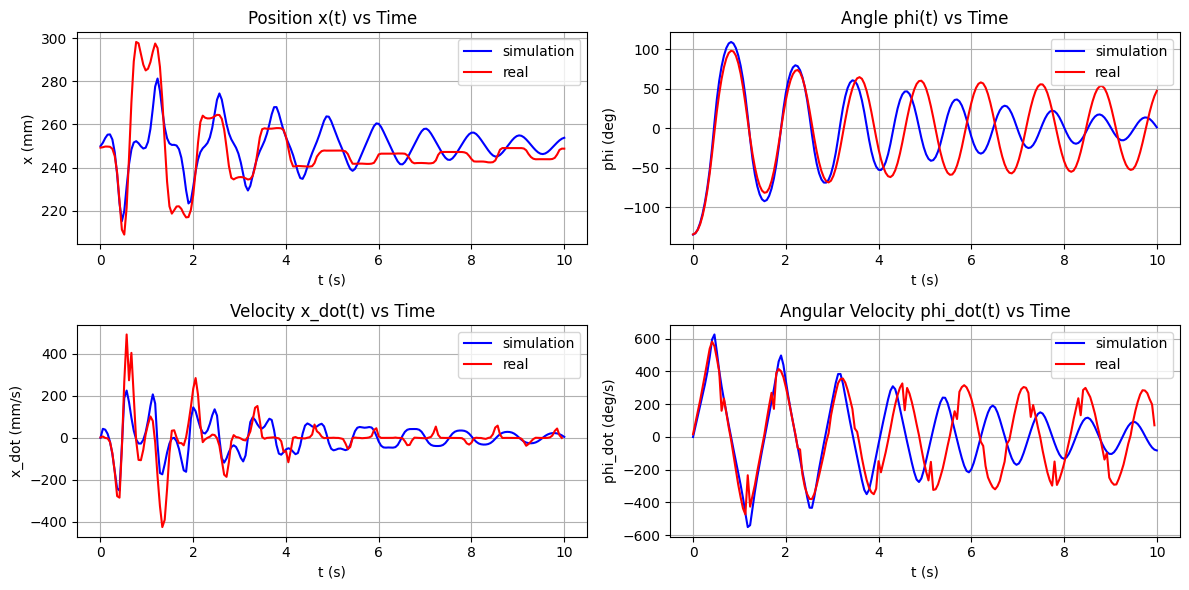

In [313]:
# Plotting subplots
plt.figure(figsize=(12, 6))

# Plotting x(t)
plt.subplot(221)
# Since we use meters in simulation, but mm in plots => we need to multiply x_sol and x_dot_sol by 1000
plt.plot(t_span, x_sol*1000, 'b', label='simulation')
plt.plot(t_span, position_data_average_135, 'r', label='real')
plt.xlabel('t (s)')
plt.ylabel('x (mm)')
plt.title('Position x(t) vs Time')
plt.legend()
plt.grid(True)

# Plotting phi(t)
plt.subplot(222)
plt.plot(t_span, phi_deg, 'b', label='simulation')
plt.plot(t_span, angle_data_average_135, 'r', label='real')
plt.xlabel('t (s)')
plt.ylabel('phi (deg)')
plt.title('Angle phi(t) vs Time')
plt.legend()
plt.grid(True)

# Plotting x_dot(t)
plt.subplot(223)
# Since we use meters in simulation, but mm in plots => we need to multiply x_sol and x_dot_sol by 1000
plt.plot(t_span, x_dot_sol*1000, 'b', label='simulation')
plt.plot(t_span[:-1], position_velocity_135_average, 'r', label='real')
plt.xlabel('t (s)')
plt.ylabel('x_dot (mm/s)')
plt.title('Velocity x_dot(t) vs Time')
plt.legend()
plt.grid(True)

# Plotting phi_dot(t)
plt.subplot(224)
plt.plot(t_span, phi_dot_deg, 'b', label='simulation')
plt.plot(t_span[:-1], angle_velocity_135_average, 'r', label='real')
plt.xlabel('t (s)')
plt.ylabel('phi_dot (deg/s)')
plt.title('Angular Velocity phi_dot(t) vs Time')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("./plots/compare_135.jpg")
plt.show()